# Geolocalisation of Planet data

In [50]:
# Setup code for the notebook
%matplotlib notebook
# Autoreload external python modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

from ipytools import display_imshow
from ipytools import readGTIFF
from ipytools import writeGTIFF
from ipytools import readGTIFFmeta
from ipytools import display_gallery
from ipytools import display_RSO

from glob import glob

from rpc_model import RPCModel

import json

# Tools to handle S03
from tools import s03_handler
from tools import data_handler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
lst_tif, area, triplets = s03_handler()

In [23]:
lst_tif

['../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d2_0008.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0014.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d3_0014.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d2_0002.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d2_0018.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d2_0010.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0002.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0005.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0017.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d2_0011.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d2_0004.tif',
 '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0004.tif',
 '..

In [22]:
area

{'d1': {1: {'1Z': '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0001.tif',
   '7Z': '../data/s03_20161003T161107Z/panchromatic/s03_20161003T161107Z_pan_d1_0001.tif',
   '8Z': '../data/s03_20161003T161148Z/panchromatic/s03_20161003T161148Z_pan_d1_0001.tif'},
  2: {'1Z': '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0002.tif',
   '7Z': '../data/s03_20161003T161107Z/panchromatic/s03_20161003T161107Z_pan_d1_0002.tif',
   '8Z': '../data/s03_20161003T161148Z/panchromatic/s03_20161003T161148Z_pan_d1_0002.tif'},
  3: {'1Z': '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0003.tif',
   '7Z': '../data/s03_20161003T161107Z/panchromatic/s03_20161003T161107Z_pan_d1_0003.tif',
   '8Z': '../data/s03_20161003T161148Z/panchromatic/s03_20161003T161148Z_pan_d1_0003.tif'},
  4: {'1Z': '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0004.tif',
   '7Z': '../data/s03_20161003T161107Z/panchromatic/s03_20161003T1611

In [24]:
triplets

{'1Z': {'d1': {1: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0001.tif',
   2: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0002.tif',
   3: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0003.tif',
   4: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0004.tif',
   5: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0005.tif',
   6: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0006.tif',
   7: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0007.tif',
   8: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0008.tif',
   9: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0009.tif',
   10: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0010.tif',
   11: '../data/s03_20161003T161231Z/panchromatic/s03_20161003T161231Z_pan_d1_0011.tif',
   12: '../data/s0

# S03

In [88]:
display_RSO(readGTIFF(L[0]), plot = False).squeeze().shape

(1349, 3199)

(1349, 3199)

In [126]:
for i in range(h * w):
    print (i, (i % h) * w + i // h)

0 0
1 3
2 6
3 9
4 12
5 15
6 1
7 4
8 7
9 10
10 13
11 16
12 2
13 5
14 8
15 11
16 14
17 17


<IPython.core.display.Javascript object>


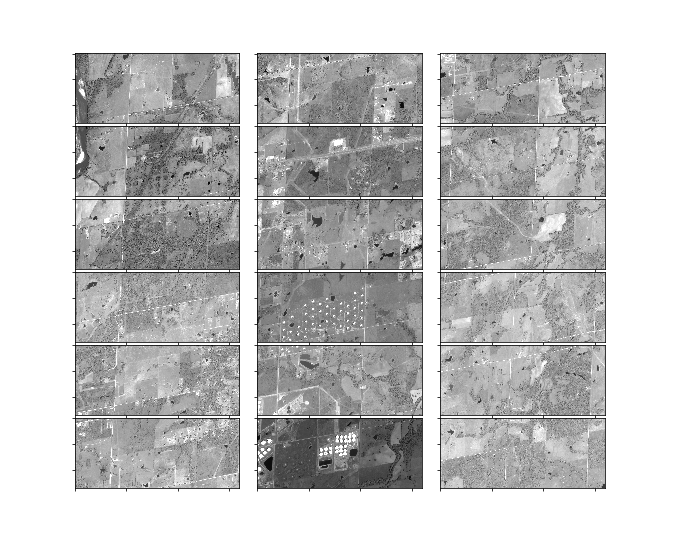

In [165]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

L = list(triplets['1Z']['d1'].values())
L.sort()
shape = display_RSO(readGTIFF(L[1]), plot = False).squeeze().shape
ratio = shape[1] / shape[0]


h, w, scale, ratio = 6, 3, 1, ratio
plt.figure(figsize = (ratio * scale * w, scale * h))
gs1 = gridspec.GridSpec(h, w)
gs1.update(wspace=0.025, hspace=0.05) # set the spacing between axes. 

for i in range(h * w):
   # i = i + 1 # grid spec indexes from 0
    ax1 = plt.subplot(gs1[(i % h) * w + i // h])
    plt.axis('on')
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    ax1.imshow(display_RSO(readGTIFF(L[i]), plot = False).squeeze(), cmap = "gray")
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()

<IPython.core.display.Javascript object>


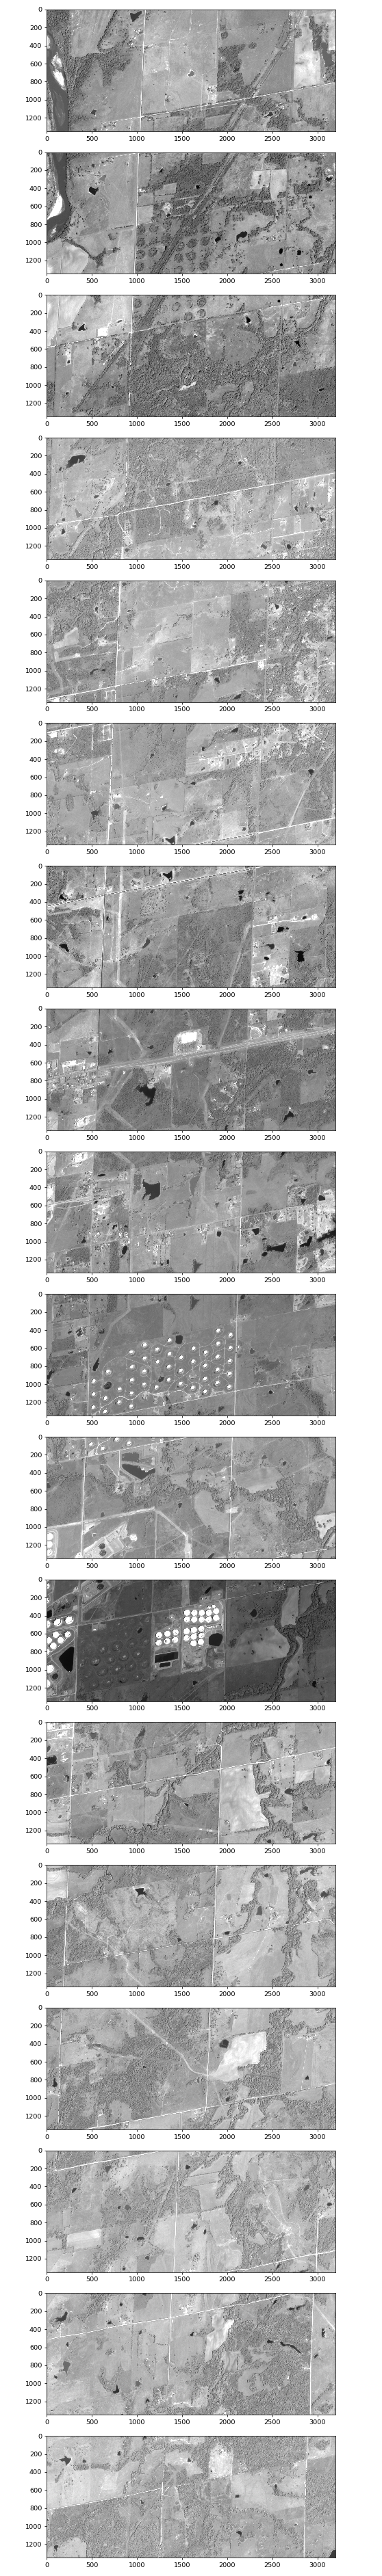

In [166]:
L = list(triplets['1Z']['d1'].values())
L.sort()
l = len(L)

f, ax = plt.subplots(l, 1, figsize = (8, l * 3))
for i in range(l):
    ax[i].imshow(display_RSO(readGTIFF(L[i]), plot = False).squeeze(), cmap = "gray")
f.tight_layout()